In [18]:
from mpl_toolkits import mplot3d

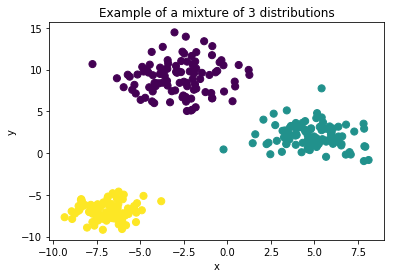

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
n_components = 3
X, truth = make_blobs(n_samples=300, centers=n_components, 
                      cluster_std = [2, 1.5, 1], 
                      random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

In [20]:
# Extract x and y
x = X[:, 0]
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-11.097585529030251 9.858180523990058 -11.545696279950441 16.81828998331647


In [21]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5,1,'2D Gaussian Kernel density estimation')

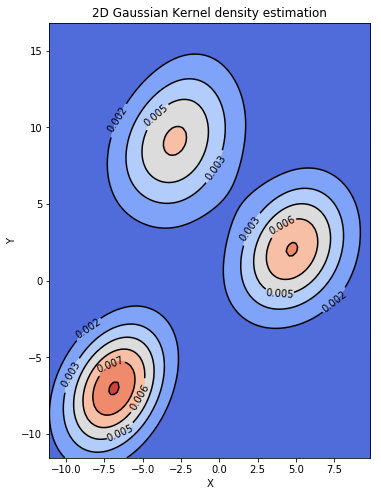

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

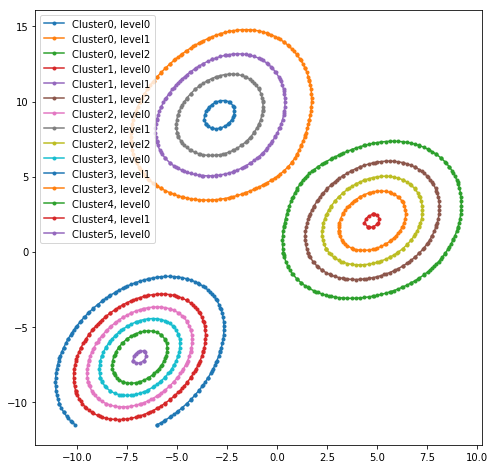

In [23]:
plt.figure(figsize=(8,8))
for j in range(len(cset.allsegs)):
    for ii, seg in enumerate(cset.allsegs[j]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=f'Cluster{j}, level{ii}')
plt.legend()

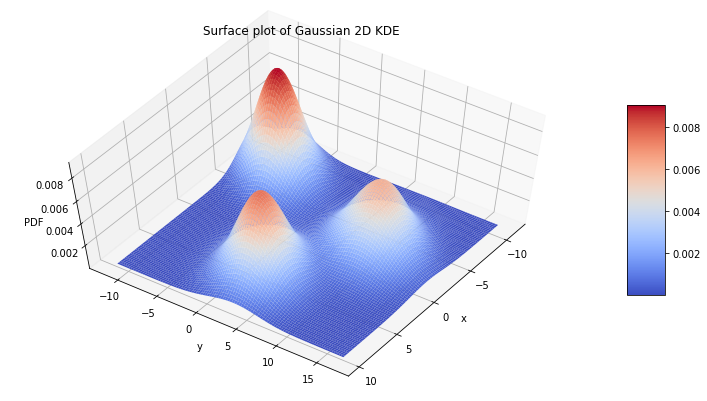

In [28]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)